In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Secant Method
- Implement the <b>Secant method</b> as a function and solve the following equation:
    - $𝒇(𝒙)=𝒙^𝟑−𝒙^𝟐−𝟏𝟓𝒙+𝟏$,          𝒙_𝟎=𝟒.𝟓
- Draw the functions and check out the roots.
- Try your function with different initialization and check out the results.
- Compare the results with the one from Newton's method.

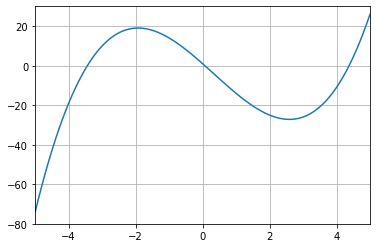

In [3]:
f = lambda x: x**3 - x**2 - 15*x + 1
x = np.linspace(-5, 5, 100)
plt.xlim(-5, 5)
plt.ylim(-80, 30)
plt.grid()
plt.plot(x, f(x))

In [4]:
def Secant_Method(f, x_old, eps=1e-8, x=4.5, max_itr=100):
    for i in range(1, max_itr):
        x_new = x - (f(x) * (x_old-x) / (f(x_old) - f(x)))
        # x_diff = np.abs(x_new - x)
        # if x_diff < eps:
        if f(x_new) < eps:
            break
        x_old = x
        x = x_new
    return i, x_new, f(x_new)

In [5]:
# Secant with initial xk-1 = 5.5, epsilon = 1e-8
iter, root, fr = Secant_Method(f=f, x_old=5.5)
print('Found solution after {} iterations.'.format(iter))
print('r = {}'.format(root))
print('f(r1) = {}'.format(fr))

Found solution after 5 iterations.
r = 4.375753855672038
f(r1) = 3.097966327914037e-12


In [6]:
# Secant with initial xk-1 = 4.51, epsilon = 1e-8
iter, root, fr = Secant_Method(f=f, x_old=4.51)
print('Found solution after {} iterations.'.format(iter))
print('r = {}'.format(root))
print('f(r1) = {}'.format(fr))

Found solution after 4 iterations.
r = 4.3757538557143265
f(r1) = 1.427807205800491e-09


In [7]:
# Secant with initial xk-1 = 0, epsilon = 1e-8
iter, root, fr = Secant_Method(f=f, x_old=0)
print('Found solution after {} iterations.'.format(iter))
print('r = {}'.format(root))
print('f(r1) = {}'.format(fr))

Found solution after 4 iterations.
r = -3.671133716289983
f(r1) = -6.886903905295014


In [8]:
f = lambda x: x**3 - x**2 - 15*x + 1
df1 = lambda x: 3*(x**2) - 2*x - 15

def Newton_Method(alpha, x_old, eps=1e-8, max_itr=100):
    x = x_old
    for i in range(1, max_itr):
        x_new = x - alpha * (f(x) / df1(x))
        if f(x_new) < eps:
            break
        x = x_new
    return i, x_new, f(x_new)

In [9]:
# Newton's with epsilon = 1e-8
iter, root, fr = Newton_Method(alpha=0.95, x_old=5.5)
print('Found solution after {} iterations.'.format(iter))
print('r = {}'.format(root))
print('f(r1) = {}'.format(fr))

Found solution after 9 iterations.
r = 4.375753855720403
f(r1) = 1.6325572005371214e-09


## Newton's Method Optimization
### Single Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐−𝟏𝟓𝒙+𝟏$,        
- Draw the functions and check out the minimum.
- Draw the 1st derivative of the function and check out the root.
- Draw 2nd derivative of the function and check out the sign at the minimum.
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.

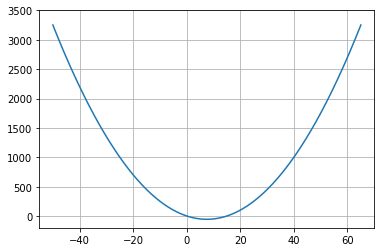

In [10]:
f = lambda x: x**2 - 15*x + 1
x = np.linspace(-50, 65, 1000)
plt.xlim(-55, 70)
plt.ylim(-200, 3500)
plt.grid()
plt.plot(x, f(x))

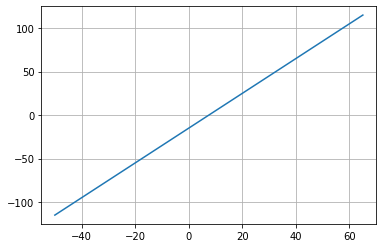

In [15]:
df1 = lambda x: 2*x - 15
x = np.linspace(-50, 65, 1000)
plt.xlim(-55, 70)
plt.ylim(-125, 125)
plt.grid()
plt.plot(x, df1(x))

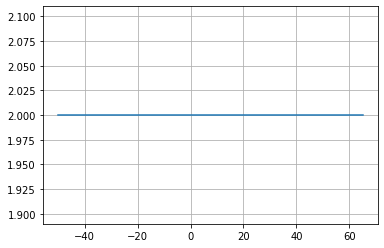

In [32]:
x = np.linspace(-50, 65, 50)
df2 = lambda x: 2
plt.plot(x, [df2(x)]*len(x))
plt.grid()
plt.show()

In [43]:
def GD(alpha, x0, eps):
    x = x0
    for i in range(1, 1000):
        grad = df1(x)
        x = x - alpha * grad
        if df1(x) < eps:
            break
    return i, x, df1(x)

In [44]:
# Gradient descent with learning rate = 0.01, x0=40, epsilon = 0.1
iter, root, fr = GD(alpha=0.01, x0=40, eps=0.1)
print('Found solution after {} iterations.'.format(iter))
print('\n', (root, fr))

Found solution after 321 iterations.

 (7.549596800192111, 0.09919360038422198)


In [41]:
def Newton(alpha, x0, eps):
    x = x0
    for i in range(1, 1000):
        x = x - alpha * ((df1(x) / df2(x)))
        if df1(x) < eps:
            break
    return i, x, df1(x)

In [42]:
# Newton's method without learning rate, x0=40, epsilon = 0.1
iter, root, fr = Newton(alpha=1, x0=40, eps=0.1)
print('Found solution after {} iterations.'.format(iter))
print('\n', (root, fr))

Found solution after 1 iterations.

 (7.5, 0.0)


In [45]:
# Newton's method with learning rate = 0.8, x0=40, epsilon = 0.1
iter, root, fr = Newton(alpha=0.8, x0=40, eps=0.1)
print('Found solution after {} iterations.'.format(iter))
print('\n', (root, fr))

Found solution after 5 iterations.

 (7.5104, 0.020799999999999486)


### Multi Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.

In [46]:
from sympy import *
from sympy.plotting import plot3d

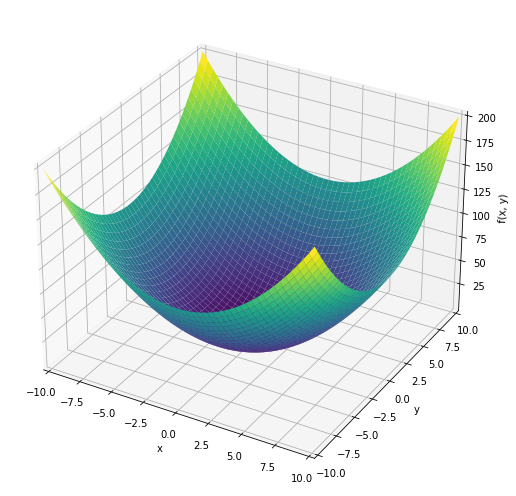

In [47]:
x,y = symbols('x y')
f = x**2 + y**2
plot3d(f,size=(10,7))

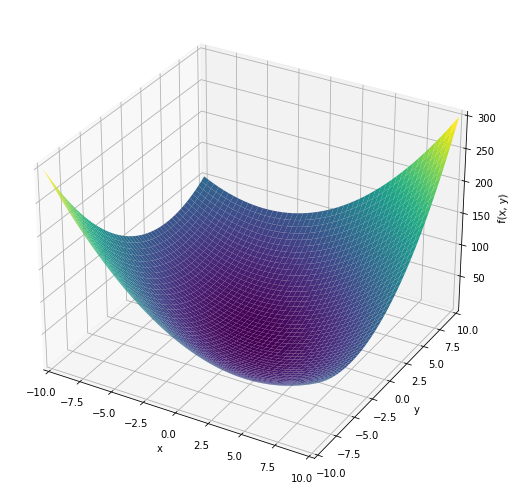

In [48]:
x,y = symbols('x y')
f = x**2 + x * y + y**2
plot3d(f,size=(10,7))

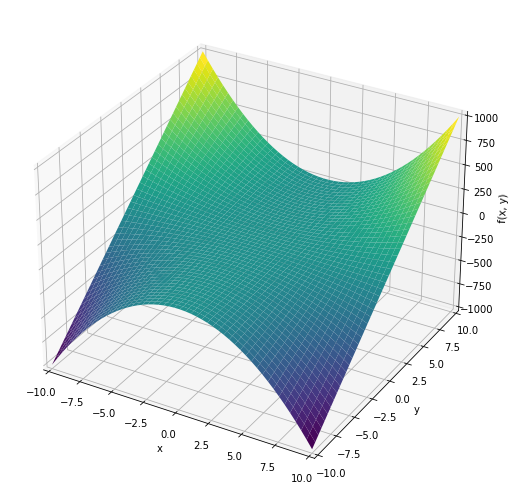

In [49]:
x,y = symbols('x y')
f = x**2 * y
plot3d(f,size=(10,7))

In [24]:
# First function
# Multi-variable Gradient descent with learning rate = 0.1,
# x0=(10,10), epsilon = 0.001


Found solution after 46 iterations.


(array([0.00034845, 0.00034845]), array([0.0006969, 0.0006969]))

In [26]:
# First function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001



Found solution after 1 iterations.


(array([0., 0.]), array([0., 0.]))

In [28]:
# First function
# Multi-variable Newton's method with learning rate = 0.5, 
# x0=(10,10), epsilon = 0.001


Found solution after 15 iterations.


(array([0.00030518, 0.00030518]), array([0.00061035, 0.00061035]))

In [97]:
# Second function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001


Found solution after 16 iterations.


(array([0.00015259, 0.00015259]), array([0.00045776, 0.00045776]))

In [99]:
# Second function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001


Found solution after 1 iterations.


(array([0., 0.]), array([0., 0.]))

In [100]:
# First function
# Multi-variable Newton's method with learning rate = 0.9, 
# x0=(10,10), epsilon = 0.001


Found solution after 5 iterations.


(array([0.0001, 0.0001]), array([0.0003, 0.0003]))

In [39]:
# Third function
# Multi-variable Gradient descent with learning rate = 0..01,
# x0=(10,10), epsilon = 0.001



Found solution after 79 iterations.


(array([6.80598421e-05, 6.85061189e+00]),
 array([9.32503127e-04, 4.63214210e-09]))

In [40]:
# Third function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001


Found solution after 9 iterations.


(array([0.01953125, 0.01953125]), array([0.00076294, 0.00038147]))

## BFGS
- Implement the <b>BFGS</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results from Gradient descent and Newton's method.

![](file:///d%3A/iTi/Study/Intake%2042/Numerical%20Algorithms/Labs/Numerical-Algorithms/BFGS.png)

In [30]:
def BFGS(x0, x1, eps, alpha=1):
    I = np.identity(len(x0))
    B_inv = I

    x0 = np.asarray(x0, dtype=np.float32)
    x1 = np.asarray(x1, dtype=np.float32)

    for i in range(100):

        grad_x0 = np.array((Dfx(x0), Dfy(x0)))
        grad_x1 = np.array((Dfx(x1), Dfy(x1)))

        print('xn-1:\n{}\nxn:\n{}'.format(x0.reshape(-1, 1), x1.reshape(-1, 1)))
        print('Dfxn-1:\n{}\nDfxn:\n{}'.format(np.array([Dfx(x0), Dfy(x0)]).reshape(-1, 1), np.array([Dfx(x1), Dfy(x1)]).reshape(-1, 1)))
        print(np.linalg.norm(grad_x1))
        print('*****')

        delta_x = x1 - x0
        y = grad_x1 - grad_x0

        seg1 = 1.0 / np.dot(y, delta_x)
        seg2 = I - seg1 * delta_x.reshape(-1, 1) * y.reshape(1, -1)
        seg3 = I - seg1 * y.reshape(-1, 1) * delta_x.reshape(1, -1)

        B_inv = np.dot(seg2, np.dot(B_inv, seg3)) + (seg1 * delta_x.reshape(-1, 1) * delta_x.reshape(1, -1))

        print('B_inv:\n', B_inv)
        print('****************')

        x2 = x1 - alpha * np.dot(B_inv, grad_x1)

        if np.linalg.norm(grad_x1) < eps:
            break
        
        x0 = x1
        x1 = x2

    return i, (x1.reshape(-1, 1), grad_x1.reshape(-1, 1))

In [20]:
# First Function
f = lambda x: x[0]**2 + x[1]**2

Dfx = lambda x: 2*x[0]
Dfy = lambda y: 2*y[1]

DDfx = lambda x: 2
DDfy = lambda y: 2

DDfxy = lambda x: 0
DDfyx = lambda y: 0

In [21]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001
i, sol = BFGS(x0=(10, 10), x1=(9, 9), eps=0.001)
print('Found solution after {} iterations.'.format(i))
print(sol)

xn-1:
[[10.]
 [10.]]
xn:
[[9.]
 [9.]]
Dfxn-1:
[[20.]
 [20.]]
Dfxn:
[[18.]
 [18.]]
25.45584412271571
*****
B_inv:
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn-1:
[[9.]
 [9.]]
xn:
[[0.]
 [0.]]
Dfxn-1:
[[18.]
 [18.]]
Dfxn:
[[0.]
 [0.]]
0.0
*****
B_inv:
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
Found solution after 1 iterations.
(array([[0.],
       [0.]]), array([[0.],
       [0.]]))


In [22]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001, 
## learning rate =0.9
i, sol = BFGS(x0=(10, 10), x1=(9, 9), eps=0.001, alpha=0.9)
print('Found solution after {} iterations.'.format(i))
print(sol)

xn-1:
[[10.]
 [10.]]
xn:
[[9.]
 [9.]]
Dfxn-1:
[[20.]
 [20.]]
Dfxn:
[[18.]
 [18.]]
25.45584412271571
*****
B_inv:
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn-1:
[[9.]
 [9.]]
xn:
[[0.9]
 [0.9]]
Dfxn-1:
[[18.]
 [18.]]
Dfxn:
[[1.8]
 [1.8]]
2.545584412271572
*****
B_inv:
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn-1:
[[0.9]
 [0.9]]
xn:
[[0.09]
 [0.09]]
Dfxn-1:
[[1.8]
 [1.8]]
Dfxn:
[[0.18]
 [0.18]]
0.25455844122715704
*****
B_inv:
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn-1:
[[0.09]
 [0.09]]
xn:
[[0.009]
 [0.009]]
Dfxn-1:
[[0.18]
 [0.18]]
Dfxn:
[[0.018]
 [0.018]]
0.025455844122715694
*****
B_inv:
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn-1:
[[0.009]
 [0.009]]
xn:
[[0.0009]
 [0.0009]]
Dfxn-1:
[[0.018]
 [0.018]]
Dfxn:
[[0.0018]
 [0.0018]]
0.0025455844122715702
*****
B_inv:
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn-1:
[[0.0009]
 [0.0009]]
xn:
[[9.e-05]
 [9.e-05]]
Dfxn-1:
[[0.0018]
 [0.0018]]
Dfxn:
[[0.00018]
 [0.00018]]
0.00025455844122715686
*****


In [31]:
# Second Function
f = lambda x: x[0]**2 + x[0]*x[1] + x[1]**2

Dfx = lambda x: 2*x[0] + x[1]
Dfy = lambda y: 2*y[1] + y[0]

DDfx = lambda x: 2
DDfy = lambda y: 2

DDfxy = lambda x: 1
DDfyx = lambda y: 1

In [32]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001
i, sol = BFGS(x0=(10, 10), x1=(9, 9), eps=0.001)
print('Found solution after {} iterations.'.format(i))
print(sol)

xn-1:
[[10.]
 [10.]]
xn:
[[9.]
 [9.]]
Dfxn-1:
[[30.]
 [30.]]
Dfxn:
[[27.]
 [27.]]
38.18376618407357
*****
B_inv:
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
*****
x1 [-2.68220901e-07 -2.68220901e-07]
*****
xn-1:
[[9.]
 [9.]]
xn:
[[-2.68220901e-07]
 [-2.68220901e-07]]
Dfxn-1:
[[27.]
 [27.]]
Dfxn:
[[-8.04662704e-07]
 [-8.04662704e-07]]
1.137964909794139e-06
*****
B_inv:
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
Found solution after 1 iterations.
(array([[-2.68220901e-07],
       [-2.68220901e-07]]), array([[-8.04662704e-07],
       [-8.04662704e-07]]))


In [33]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001,
## learning rate  = 0.9
i, sol = BFGS(x0=(10, 10), x1=(9, 9), eps=0.001, alpha=0.9)
print('Found solution after {} iterations.'.format(i))
print(sol)

xn-1:
[[10.]
 [10.]]
xn:
[[9.]
 [9.]]
Dfxn-1:
[[30.]
 [30.]]
Dfxn:
[[27.]
 [27.]]
38.18376618407357
*****
B_inv:
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
*****
x1 [0.89999976 0.89999976]
*****
xn-1:
[[9.]
 [9.]]
xn:
[[0.89999976]
 [0.89999976]]
Dfxn-1:
[[27.]
 [27.]]
Dfxn:
[[2.69999928]
 [2.69999928]]
3.8183755942389364
*****
B_inv:
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
*****
x1 [0.08999998 0.08999998]
*****
xn-1:
[[0.89999976]
 [0.89999976]]
xn:
[[0.08999998]
 [0.08999998]]
Dfxn-1:
[[2.69999928]
 [2.69999928]]
Dfxn:
[[0.26999993]
 [0.26999993]]
0.3818375594238941
*****
B_inv:
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
*****
x1 [0.009 0.009]
*****
xn-1:
[[0.08999998]
 [0.08999998]]
xn:
[[0.009]
 [0.009]]
Dfxn-1:
[[0.26999993]
 [0.26999993]]
Dfxn:
[[0.02699999]
 [0.02699999]]
0.03818375594238938
*****
B_inv:
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
*****
x1 [0

In [34]:
# Third Function
f = lambda x: (x[0]**2) * x[1]

Dfx = lambda x: 2 * x[0] * x[1]
Dfy = lambda y: y[0]**2

DDfx = lambda x: 2*x[1]
DDfy = lambda y: 0

DDfxy = lambda x: 2 * x[0]
DDfyx = lambda y: 2 * y[0]

In [35]:
## Third function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001
i, sol = BFGS(x0=(10, 10), x1=(9, 9), eps=0.001)
print('Found solution after {} iterations.'.format(i))
print(sol)

xn-1:
[[10.]
 [10.]]
xn:
[[9.]
 [9.]]
Dfxn-1:
[[200.]
 [100.]]
Dfxn:
[[162.]
 [ 81.]]
181.12150617748296
*****
B_inv:
 [[ 0.23976608 -0.42690058]
 [-0.42690059  0.90643275]]
****************
*****
x1 [4.73684207 4.73684207]
*****
xn-1:
[[9.]
 [9.]]
xn:
[[4.73684207]
 [4.73684207]]
Dfxn-1:
[[162.]
 [ 81.]]
Dfxn:
[[44.87534566]
 [22.43767283]]
50.17216170317296
*****
B_inv:
 [[ 0.24648787 -0.4201788 ]
 [-0.4201788   0.91315453]]
****************
*****
x1 [3.10344826 3.10344826]
*****
xn-1:
[[4.73684207]
 [4.73684207]]
xn:
[[3.10344826]
 [3.10344826]]
Dfxn-1:
[[44.87534566]
 [22.43767283]]
Dfxn:
[[19.26278223]
 [ 9.63139112]]
21.536445253989438
*****
B_inv:
 [[ 0.26473765 -0.40192901]
 [-0.40192901  0.93140432]]
****************
*****
x1 [1.87499999 1.87499999]
*****
xn-1:
[[3.10344826]
 [3.10344826]]
xn:
[[1.87499999]
 [1.87499999]]
Dfxn-1:
[[19.26278223]
 [ 9.63139112]]
Dfxn:
[[7.03124993]
 [3.51562496]]
7.8611763999353865
*****
B_inv:
 [[ 0.28917749 -0.37748918]
 [-0.37748918  0.955844